In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = './data/raw'

train_datagen = ImageDataGenerator(
    validation_split = .20, 
    rescale= 1.0/255,
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range=.2,
    horizontal_flip = True,
    fill_mode="nearest",
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
)

# format fruit labels
class_labels = {idx: name.replace(' fruit', '') for name, idx in train_generator.class_indices.items() }

print(class_labels)

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.
{0: 'apple', 1: 'banana', 2: 'cherry', 3: 'chickoo', 4: 'grapes', 5: 'kiwi', 6: 'mango', 7: 'orange', 8: 'strawberry'}


In [ ]:
# Define a simple CNN model for classification
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.layers.Dropout(.5),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 output classes for fruit categories
])

c:\Users\antho\Coding\repos\fruit-classifier\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
class BatchLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"End of epoch {epoch + 1}: accuracy={logs.get('accuracy')}, loss={logs.get('loss')}")
    def on_batch_end(self, batch, logs=None):
        print(f"End of batch {batch + 1}: accuracy={logs.get('accuracy')}, loss={logs.get('loss')}")

In [6]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',      # Use 'binary_crossentropy' for binary classification
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_generator.samples // train_generator.batch_size),
    epochs=30,                         # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=(validation_generator.samples // validation_generator.batch_size),
    callbacks=[BatchLogger()]
)


c:\Users\antho\Coding\repos\fruit-classifier\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
End of batch 1: accuracy=0.25, loss=2.1975150108337402
 1/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2500 - loss: 2.1975End of batch 2: accuracy=0.125, loss=10.500460624694824
 2/36 ━━━━━━━━━━━━━━━━━━━━ 16s 495ms/step - accuracy: 0.1875 - loss: 6.3490End of batch 3: accuracy=0.0833333358168602, loss=9.577166557312012
 3/36 ━━━━━━━━━━━━━━━━━━━━ 17s 532ms/step - accuracy: 0.1528 - loss: 7.4250End of batch 4: accuracy=0.0625, loss=8.535538673400879
 4/36 ━━━━━━━━━━━━━━━━━━━━ 16s 517ms/step - accuracy: 0.1302 - loss: 7.7027End of batch 5: accuracy=0.05000000074505806, loss=7.413122653961182
 5/36 ━━━━━━━━━━━━━━━━━━━━ 16s 523ms/step - accuracy: 0.1142 - loss: 7.6448End of batch 6: accuracy=0.0416666679084301, loss=6.576582431793213
 6/36 ━━━━━━━━━━━━━━━━━━━━ 15s 513ms/step - accuracy: 0.1021 - loss: 7.4667End of batch 7: accuracy=0.0535714291036129, loss=5.962344646453857
 7/36 ━━━━━━━━━━━━━━━━━━━━ 15s 523ms/step - accuracy: 0.0952 - loss: 7.2518End of batch 8: accuracy=0.

c:\Users\antho\Coding\repos\fruit-classifier\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


End of epoch 1: accuracy=0.1215277761220932, loss=2.8742799758911133
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 572ms/step - accuracy: 0.1032 - loss: 4.2837 - val_accuracy: 0.2344 - val_loss: 1.9679
Epoch 2/30


C:\Users\antho\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


End of epoch 2: accuracy=0.0, loss=0.0
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1429 - val_loss: 2.0595
Epoch 3/30
End of batch 1: accuracy=0.125, loss=2.16310977935791
 1/36 ━━━━━━━━━━━━━━━━━━━━ 17s 503ms/step - accuracy: 0.1250 - loss: 2.1631End of batch 2: accuracy=0.0625, loss=2.139394760131836
 2/36 ━━━━━━━━━━━━━━━━━━━━ 18s 556ms/step - accuracy: 0.0938 - loss: 2.1513End of batch 3: accuracy=0.125, loss=2.0548551082611084
 3/36 ━━━━━━━━━━━━━━━━━━━━ 16s 492ms/step - accuracy: 0.1042 - loss: 2.1191End of batch 4: accuracy=0.15625, loss=2.023838758468628
 4/36 ━━━━━━━━━━━━━━━━━━━━ 16s 521ms/step - accuracy: 0.1172 - loss: 2.0953End of batch 5: accuracy=0.17499999701976776, loss=2.00313401222229
 5/36 ━━━━━━━━━━━━━━━━━━━━ 15s 513ms/step - accuracy: 0.1287 - loss: 2.0769End of batch 6: accuracy=0.1458333283662796, loss=2.04768967628479
 6/36 ━━━━━━━━━━━━━━━━━━━━ 15s 504ms/step - accuracy: 0.1316 - loss: 2.0720End of batch 7: acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


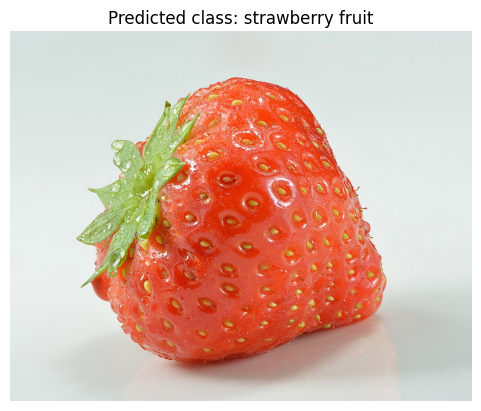

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image you want to test
img_path = './data/test/strawberry.jpg'  

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize to [0, 1]

# Make a prediction
prediction = model.predict(img_array)

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())  # Invert the mapping

# Get the predicted label
predicted_class_index = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class_index]

# Display the image with the predicted label
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_label}")
plt.show()

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,202,141 (508.13 MB)

 Trainable params: 44,400,713 (169.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,801,428 (338.75 MB)

In [9]:
steps_per_epoch = (train_generator.samples // train_generator.batch_size) + 1
validation_steps = (validation_generator.samples // validation_generator.batch_size) + 1

print(steps_per_epoch)
print(validation_steps)

37
9
